In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('/media/walml/beta1/galaxy_zoo/gz2/subjects/image_master_catalog.parquet')

In [3]:
df.iloc[0]

dr7objid                                         587732591714893851
ra_subject                                               179.042984
dec_subject                                               60.522518
rastring                                                11:56:10.32
decstring                                               +60:31:21.1
                                        ...                        
stripe82                                                          0
stripe82_coadd                                                    0
extra_original                                                    0
png_loc           /raid/scratch/walml/galaxy_zoo/gz2/png/587732/...
png_ready                                                      True
Name: 0, Length: 252, dtype: object

In [4]:
# df.columns.values

In [10]:
df['external_ref'][0]

'http://cas.sdss.org/dr7/en/tools/quicklook/quickobj.asp?id=587732591714893851'

In [12]:
df['location'].sample(5)

98671           http://s3.amazonaws.com/zoo2/150254.jpg
207395          http://s3.amazonaws.com/zoo2/209462.jpg
208045          http://s3.amazonaws.com/zoo2/178512.jpg
103615    http://s3.amazonaws.com/zoo2_extra/259825.jpg
169674           http://s3.amazonaws.com/zoo2/80792.jpg
Name: location, dtype: object

In [13]:
df['location'][:20]

0            http://s3.amazonaws.com/zoo2/58957.jpg
1           http://s3.amazonaws.com/zoo2/193641.jpg
2            http://s3.amazonaws.com/zoo2/55934.jpg
3           http://s3.amazonaws.com/zoo2/158501.jpg
4           http://s3.amazonaws.com/zoo2/110939.jpg
5     http://s3.amazonaws.com/zoo2_extra/249897.jpg
6            http://s3.amazonaws.com/zoo2/71801.jpg
7            http://s3.amazonaws.com/zoo2/87614.jpg
8           http://s3.amazonaws.com/zoo2/113304.jpg
9            http://s3.amazonaws.com/zoo2/47197.jpg
10          http://s3.amazonaws.com/zoo2/187749.jpg
11           http://s3.amazonaws.com/zoo2/24186.jpg
12          http://s3.amazonaws.com/zoo2/162781.jpg
13          http://s3.amazonaws.com/zoo2/154143.jpg
14          http://s3.amazonaws.com/zoo2/185686.jpg
15           http://s3.amazonaws.com/zoo2/92842.jpg
16          http://s3.amazonaws.com/zoo2/140163.jpg
17          http://s3.amazonaws.com/zoo2/170372.jpg
18           http://s3.amazonaws.com/zoo2/12450.jpg
19          

In [21]:
np.argmax(df['location'] == 'http://s3.amazonaws.com/zoo2/100008.jpg')

97695

In [22]:
df['location'][97695]

'http://s3.amazonaws.com/zoo2/100008.jpg'

In [23]:
np.argmax(df['location'] == 'http://s3.amazonaws.com/zoo2/100053.jpg')

0

In [28]:
df.sort_values('location')['location'][30:80]

186453    http://s3.amazonaws.com/zoo2/100026.jpg
229582    http://s3.amazonaws.com/zoo2/100027.jpg
115264    http://s3.amazonaws.com/zoo2/100028.jpg
96443     http://s3.amazonaws.com/zoo2/100029.jpg
95445      http://s3.amazonaws.com/zoo2/10003.jpg
127334    http://s3.amazonaws.com/zoo2/100030.jpg
104356    http://s3.amazonaws.com/zoo2/100031.jpg
217650    http://s3.amazonaws.com/zoo2/100032.jpg
200636    http://s3.amazonaws.com/zoo2/100033.jpg
235170    http://s3.amazonaws.com/zoo2/100034.jpg
127538    http://s3.amazonaws.com/zoo2/100035.jpg
83713     http://s3.amazonaws.com/zoo2/100036.jpg
70624     http://s3.amazonaws.com/zoo2/100038.jpg
224262    http://s3.amazonaws.com/zoo2/100039.jpg
83393      http://s3.amazonaws.com/zoo2/10004.jpg
185112    http://s3.amazonaws.com/zoo2/100040.jpg
37482     http://s3.amazonaws.com/zoo2/100041.jpg
211697    http://s3.amazonaws.com/zoo2/100042.jpg
182475    http://s3.amazonaws.com/zoo2/100043.jpg
39727     http://s3.amazonaws.com/zoo2/100045.jpg


In [32]:
import hashlib
import glob

def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

In [42]:
hash_aws = md5('/media/walml/beta1/misc_downloads/100143.jpeg')
# hash_kaggle = md5('/media/walml/beta1/misc_downloads/100143.jpeg')
hash_aws

'3b68cc06515fff1c94b974ee116c5d35'

In [33]:
kaggle_locs = glob.glob('/home/walml/repos/morphology-tools/anomaly/data/images_training_rev1/*.jpg')

In [34]:
len(kaggle_locs)

61578

In [36]:
kaggle_locs[0]

'/home/walml/repos/morphology-tools/anomaly/data/images_training_rev1/991603.jpg'

In [39]:
hashes_kaggle = [md5(loc) for loc in kaggle_locs]  # pretty quick

In [41]:
hashes_kaggle[:10]

['1b403ff3740cfe713f895c91d24c4295',
 '6dd554f7309f9f9ed6e1d0fd8e9919b2',
 '2cafccdc1fc7534d0d328045a98eeb13',
 '94adacf35234e7eafda48236e14fc640',
 '7235fbfaa85832b0cd26adb3e3ef9d8b',
 '5a30fb0fb61bdb6502d9adce269bd12b',
 '800d2f7fa3d373e7c6c36dc9081445bd',
 '22a455a9485f2361e1045931b1df99fa',
 '607eb9fc78422a65bd30f630813403db',
 '1783450262d03a57ee59b0083f7df092']

In [43]:
hash_aws in hashes_kaggle

False

In [44]:
team_locs = glob.glob('/media/walml/beta1/galaxy_zoo/gz2/png/*/*.png')
len(team_locs)


239695

In [45]:
hashes_team = [md5(loc) for loc in team_locs]

In [46]:
hash_aws in hashes_team

True

In [48]:
hashes_team.index(hash_aws)

99425

In [49]:
team_locs[hashes_team.index(hash_aws)]  # this is 100143.jpg from AWS as expected!

'/media/walml/beta1/galaxy_zoo/gz2/png/587736/587736915146703138.png'

In [50]:
kaggle_map = pd.read_csv('/home/walml/Downloads/kaggle_gz_allgals_randomgalaxyid.csv')

In [51]:
kaggle_map.head()

,GalaxyID,dr7objid,Usage
0,210392,587733608013168910,training
1,391155,587745404150480989,training
2,452633,587726100953432374,training
3,591004,587731186198970494,training
4,578384,588017978342572164,training


In [52]:
kaggle_map.sort_values('GalaxyID')

,GalaxyID,dr7objid,Usage
51800,100008,587732484346872070,training
136532,100018,587735742617354500,private
31742,100023,588017627241906351,training
118791,100037,587725994650501340,private
126517,100042,588011098872545303,private
...,...,...,...
10915,999967,587738197193261169,training
126016,999981,587736941983236313,private
114421,999990,587738617564430509,private
140484,999994,587739610245103719,private


In [5]:
forest = pd.read_csv('/home/walml/repos/morphology-tools/temp_latest_forest_df.csv')
forest['GalaxyID'] = forest['objid']
del forest['objid']

In [6]:
cnn = pd.read_csv('/home/walml/repos/morphology-tools/temp_latest_cnn_df.csv')

In [7]:
forest[['GalaxyID', 't06_odd_a14_yes_fraction']]

,GalaxyID,t06_odd_a14_yes_fraction
0,100008,0.054453
1,100023,0.189149
2,100053,0.000000
3,100078,0.320398
4,100090,0.029383
...,...,...
60710,999948,0.245734
60711,999950,0.127644
60712,999958,0.839186
60713,999964,0.864000


In [8]:
cnn.columns.values[-10:]

array(['feat_1277_pred', 'feat_1278_pred', 'feat_1279_pred', 'png_loc',
       'id_str', 'dr7objid', 't06_odd_a14_yes_fraction', 'GalaxyID',
       'Class6.1', 't06_odd_a14_yes_fraction_kaggle'], dtype=object)

In [9]:
cnn[['dr7objid', 'GalaxyID', 't06_odd_a14_yes_fraction']]

,dr7objid,GalaxyID,t06_odd_a14_yes_fraction
0,587739814780403912,116417,0.163
1,587735696444096613,898733,0.050
2,587742615632347407,566018,0.045
3,587736543092932735,789640,0.531
4,587738564943348138,272005,0.109
...,...,...,...
60539,587741722284916886,488853,0.079
60540,587734949121622158,317340,0.107
60541,587730846893081087,861215,0.044
60542,587735241179398332,107597,0.095


In [10]:
forest.columns.values

array(['Residual_90', 'Residual_80', 'Residual_70', 'Residual_60',
       'Residual_50', 'Residual_0', 'Offset_90', 'Offset_80', 'Offset_70',
       'Offset_60', 'Offset_50', 'Offset_0', 'Aspect_90', 'Aspect_80',
       'Aspect_70', 'Aspect_60', 'Aspect_50', 'Aspect_0', 'Theta_90',
       'Theta_80', 'Theta_70', 'Theta_60', 'Theta_50', 'Theta_0',
       'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1',
       'Class5.2', 'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2',
       'Class7.1', 'Class7.2', 'Class7.3', 'Class8.1', 'Class8.2',
       'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7',
       'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
       'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
       'Class11.5', 'Class11.6', 't06_odd_a14_yes_fraction', 'GalaxyID'],
      dtype=object)

In [11]:
len(set(cnn['GalaxyID']) & set(forest['GalaxyID']))

59727

In [12]:
len(set(cnn['GalaxyID']) - set(forest['GalaxyID']))

817

In [13]:
len(set(forest['GalaxyID']) - set(cnn['GalaxyID']))

988

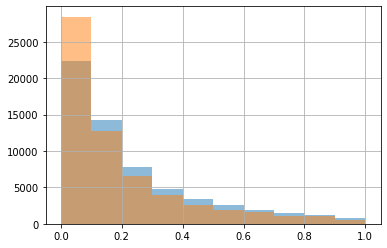

In [14]:
_, bins = np.histogram(np.linspace(0., 1.))
forest['Class6.1'].hist(alpha=.5, bins=bins)
cnn['t06_odd_a14_yes_fraction'].hist(alpha=.5, bins=bins)

In [15]:
(forest['Class6.1'] > 0.9).sum(), (cnn['t06_odd_a14_yes_fraction'] > 0.9).sum()

(851, 578)

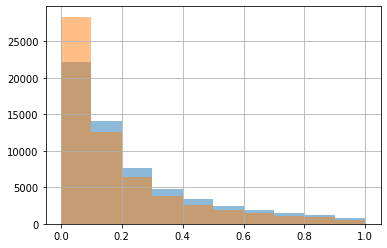

In [16]:
in_both = set(cnn['GalaxyID']) & set(forest['GalaxyID'])
forest_both = forest[forest['GalaxyID'].isin(in_both)]
cnn_both = cnn[cnn['GalaxyID'].isin(in_both)]

_, bins = np.histogram(np.linspace(0., 1.))
forest_both['Class6.1'].hist(alpha=.5, bins=bins)
cnn_both['t06_odd_a14_yes_fraction'].hist(alpha=.5, bins=bins)

Okay, so class 6.1 is not the same as t06_odd_a14_yes_fraction.
Probably the 2014 table in Kaggle is a little different to the 2016 table in Hart16
Lets use the 2014 values for both

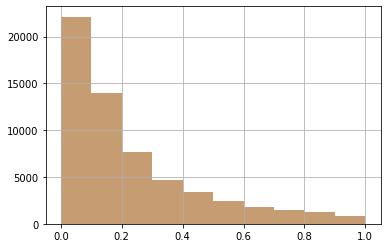

In [17]:
forest_both['Class6.1'].hist(alpha=.5, bins=bins)
cnn_both['t06_odd_a14_yes_fraction_kaggle'].hist(alpha=.5, bins=bins)

In [18]:
(forest_both['Class6.1'] > 0.9).sum(), (cnn_both['t06_odd_a14_yes_fraction_kaggle'] > 0.9).sum()

(835, 835)

In [19]:
(forest['Class6.1'] > 0.9).sum(), (cnn['t06_odd_a14_yes_fraction_kaggle'] > 0.9).sum()

(851, 903)

Yep, the difference was between the kaggle and 2016 catalogs

Missing some forest makes sense- nan values in features. But why cnn drops some?

catalog and cnn features merge perfectly so cnn isn't dropping some via nans

presumably the 2016 catalog is missing some kaggle galaxies - lets check

In [21]:
len(catalog)

239695

In [28]:
catalog

,dr7objid,t06_odd_a14_yes_fraction
0,587732591714893851,0.262
1,588009368545984617,0.024
2,587732484359913515,0.242
3,587741723357282317,0.179
4,587738410866966577,0.098
...,...,...
239690,587741490371625059,0.049
239691,587731174917669027,0.811
239692,587731512070177108,0.116
239693,587731513145688256,0.872


In [2]:
kaggle_df = pd.read_csv('/media/walml/beta1/galaxy_zoo/gz2/kaggle/training_solutions_rev1.csv', usecols=['GalaxyID', 'Class6.1'])  # from kaggle
key_df = pd.read_csv('/home/walml/Downloads/kaggle_gz_allgals_randomgalaxyid.csv', usecols=['GalaxyID', 'dr7objid'])
kaggle_df['GalaxyID'] = kaggle_df['GalaxyID'].astype(str)
key_df['GalaxyID'] = key_df['GalaxyID'].astype(str)
key_df['dr7objid'] = key_df['dr7objid'].astype(str)
kaggle_df['t06_odd_a14_yes_fraction_kaggle'] = kaggle_df['Class6.1']
kaggle_key_df = pd.merge(kaggle_df, key_df, on='GalaxyID', how='inner')
print(len(kaggle_df), len(key_df), len(kaggle_key_df))


61578 141596 61578


In [33]:
catalog['dr7objid'] = catalog['dr7objid'].astype(str)

In [34]:
key_df['dr7objid']

0         587733608013168910
1         587745404150480989
2         587726100953432374
3         587731186198970494
4         588017978342572164
                 ...        
141591    587727942423871494
141592    587741490912493648
141593    587728677397004342
141594    587741532788424785
141595    588017991238287378
Name: dr7objid, Length: 141596, dtype: object

In [37]:
cat_and_kag = pd.merge(catalog, key_df, on='dr7objid', how='inner')
len(cat_and_kag)

139238

In [38]:
dropped_dr7ids = set(key_df['dr7objid']) - set(catalog['dr7objid'])  # key includes 140k, not 60k
len(dropped_dr7ids)

2358

In [41]:
dropped_but_in_kaggle_subset = dropped_dr7ids & set(kaggle_key_df['dr7objid'])
len(dropped_but_in_kaggle_subset)

1034

In [45]:
cnn_missed = set(forest['GalaxyID']) - set(cnn['GalaxyID'])
len(cnn_missed)

988

In [53]:
key_missed_rows = key_df[key_df['GalaxyID'].astype(int).isin(cnn_missed)]
len(key_missed_rows)


988

In [55]:
key_missed_rows  
# these are (all) in the forest predictions, not in the cnn predictions, but in the key

,GalaxyID,dr7objid
56,760555,587748929238335592
68,642684,588848899380609065
92,410362,587729231983739256
238,846907,588017704008024182
242,693556,587739707420573776
...,...,...
61380,461594,588017565490741294
61386,552873,587741533316579480
61396,801776,588017724937994262
61546,432666,587741722283671581


In [60]:
key_missed_rows['dr7objid']

56       587748929238335592
68       588848899380609065
92       587729231983739256
238      588017704008024182
242      587739707420573776
                ...        
61380    588017565490741294
61386    587741533316579480
61396    588017724937994262
61546    587741722283671581
61580    587730021714427909
Name: dr7objid, Length: 988, dtype: object

In [62]:
catalog[catalog['dr7objid'].astype(str).isin(key_missed_rows['dr7objid'].astype(str))]

,dr7objid,t06_odd_a14_yes_fraction


No, all missing from the hart16 catalog - as expected. So the dropped rows are entirely down to catalog changes.

Finalise the "venn diagram" catalog with both ellipse features and cnn features 

In [3]:
ellipse_loc = '/home/walml/repos/morphology-tools/anomaly/data/EllipseFitFeatures_output_back_10_12.parquet'
ellipse_df = pd.read_parquet(ellipse_loc)  # galaxy_zoo_example.py applied to full kaggle dataset
ellipse_df['GalaxyID'] = ellipse_df.index.astype(str)
print(len(ellipse_df))
ellipse_df = ellipse_df.dropna(how='any')
print(len(ellipse_df))  # should never be fewer than this many galaxies - is the final "safe" sample

61578
60715


In [5]:
cnn_df = pd.read_parquet('/media/walml/beta1/cnn_features/gz2/cnn_features_concat.parquet', columns=['id_str']) 

In [6]:
cnn_df['dr7objid'] = cnn_df['id_str'].astype(str)

In [12]:
venn_df = pd.merge(kaggle_key_df, ellipse_df, on='GalaxyID', how='inner')

In [13]:
venn_df = pd.merge(venn_df, cnn_df, on='dr7objid', how='inner')

In [14]:
len(venn_df)

59727

In [17]:
venn_df[['dr7objid', 'GalaxyID', 'Class6.1']].to_csv('/home/walml/repos/morphology-tools/anomaly/data/gz2_galaxies_with_cnn_and_ellipse_features.csv', index=False)

In [19]:
(venn_df['Class6.1'] > 0.9).sum()

835